# 1. Simulation d'une marche aleatoire

## 1. Simulation d'une marche aleatoire sur une ligne

In [19]:
N = 5
M = 10
p = 0.6
T = 10000
path = simulation(-N, M, p, T)

In [37]:
np.random.rand()

0.8966363287457697

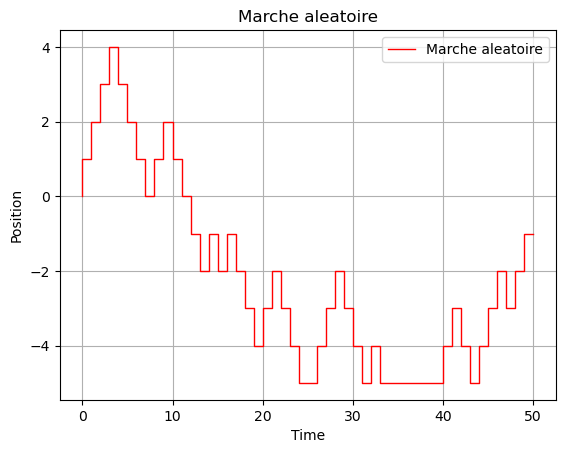

In [64]:
import matplotlib.pyplot as plt
import numpy as np

def simulation(N, M, p, T):
    pos = 0 # Starting from 0
    path = [pos]
    for i in range(T):
        if np.random.rand() < p:
            if pos != M :
                pos += 1
        else:
            if pos != -N:
                pos -= 1
        path.append(pos)
    return path

N = 5
M = 10
p = 0.4
T = 50
path = simulation(N, M, p, T)

t = np.arange(0, T+1, 1)
plt.step(t, path, color='red', linewidth=1, label='Marche aleatoire')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Marche aleatoire')
plt.legend()
plt.grid(True)
plt.show()



In [65]:
def evolution_temporelle(path, N, M):
    return [(i, round(path.count(i)/T, 2) ) for i in range(-N, M+1)]

evolution_temporelle(path,N, M)

[(-5, 0.22),
 (-4, 0.16),
 (-3, 0.16),
 (-2, 0.14),
 (-1, 0.08),
 (0, 0.06),
 (1, 0.08),
 (2, 0.06),
 (3, 0.04),
 (4, 0.02),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0)]

# 2. Power method

In [197]:
# generer la matrice de transition
def generate_transition_matrix(n, p):
    P = np.zeros((n,n))
    
    # remplir la premiere ligne de la matrice
    P[0][0] = 1-p
    P[0][1] = p
    
    # remplir la derniere ligne
    P[n - 1][n - 1] = 1 - p
    P[n - 1][n - 2] = p
    for i in range(1, n - 1):
        for j in range(n):
            if i == j:
                P[i][j-1] = 1-p
                P[i][j+1] = p
            
    return P
p = 0.4
N = 5
M = 8
n = N + M + 1
P = generate_transition_matrix(n, p)
print(P)

[[0.6 0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.6 0.  0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.6 0.  0.4 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.6 0.  0.4 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.6 0.  0.4 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.6 0.  0.4 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.6 0.  0.4 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.6 0.  0.4 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.6 0.  0.4 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6 0.  0.4 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6 0.  0.4 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6 0.  0.4]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.6]]


In [198]:
P.shape

(14, 14)

In [199]:
from numpy.linalg import norm
def algo_power_method(P, n, ϵ = 1.e-5):
    # initialization
    x = np.zeros(n)
    x[int(n/2)] = 1
    
    sum_x = x
    n_iter = 0
    
    x_moy_array = np.empty((0, n), int)

    while True:
        n_iter += 1
        next_x = x.dot(P)
        if norm(next_x - x) < ϵ:
            break
            
        x = next_x
        sum_x += x
        
        x_moy = sum_x / (n_iter + 1)
        x_moy_array = np.append(x_moy_array, np.array([x_moy]), axis=0)
        
    return x_moy_array, x


In [200]:
x_moy, x = algo_power_method(P,n)

In [201]:
x_moy

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.30060824, 0.20266962, 0.13888665, ..., 0.00644305, 0.00426045,
        0.00423427],
       [0.30074418, 0.20275109, 0.13892567, ..., 0.00643261, 0.00425364,
        0.00422756],
       [0.30087903, 0.2028319 , 0.1389644 , ..., 0.00642225, 0.00424687,
        0.0042209 ]])

In [193]:
x_moy[:, 0]

array([0.        , 0.        , 0.016     , 0.01792   , 0.02688   ,
       0.02801371, 0.0332416 , 0.03398997, 0.037265  , 0.03784131,
       0.04002099, 0.04050543, 0.04202788, 0.04245096, 0.04355658,
       0.04393159, 0.04476087, 0.04509514, 0.04573451, 0.04603313,
       0.046538  , 0.04680513, 0.04721226, 0.04745155, 0.047786  ,
       0.04800069, 0.04828001, 0.04847299, 0.0487097 , 0.04888354,
       0.04908677, 0.04924375, 0.04942023, 0.04956237, 0.04971718,
       0.04984623, 0.04998326, 0.05010074, 0.050223  , 0.05033026,
       0.0504401 , 0.0505383 , 0.05063761, 0.05072776, 0.05081804,
       0.05090103, 0.05098351, 0.05106011, 0.05113579, 0.05120667,
       0.05127639, 0.05134215, 0.05140661, 0.05146775, 0.05152755,
       0.05158453, 0.05164016, 0.05169338, 0.05174527, 0.05179508,
       0.05184361, 0.05189032, 0.05193581, 0.05197969, 0.05202242,
       0.05206373, 0.05210394, 0.05214289, 0.05218081, 0.05221759,
       0.05225341, 0.05228819, 0.05232208, 0.05235503, 0.05238

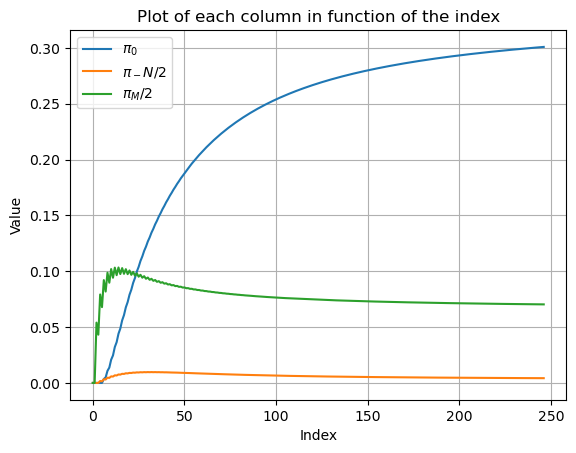

In [202]:
a = 0
b = int(-N/2)
c = int(M/2)
    
plt.plot(range(len(x_moy)), x_moy[:, a], label=f'$π_{0}$')
plt.plot(range(len(x_moy)), x_moy[:, b], label=f'$π_-N/2$')
plt.plot(range(len(x_moy)), x_moy[:, c], label=f'$π_M/2$')



plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of each column in function of the index')
plt.legend()
plt.grid(True)
plt.show()

# 3. GooglePage Rank

In [257]:
# matrice d'adjacence du graphe
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

A =np.array([
    [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7],
    [1/2,   0, 1/2,   0,   0,  0,   0 ], 
    [1/2,   0,  0,    0, 1/2,  0,   0 ],
    [1/2,   0,  0,    0, 1/2,  0,   0 ],
    [1/2,   0,  0,    0, 0,  1/2,   0 ],
    [1  ,   0,  0,    0, 0,    0,   0 ],
    [1/3, 1/3,  0,    0, 0,    1/3, 0 ] ])
np.sum(A, axis=1)


B = np.array([
    [1, 1, 1, 1, 1, 1, 1],
    [1,   0, 1,   0,   0,  0,   0 ], 
    [1,   0,  0,    0, 1,  0,   0 ],
    [1,   0,  0,    0, 1,  0,   0 ],
    [1,   0,  0,    0, 0,  1,   0 ],
    [1  ,   0,  0,    0, 0,    0,   0 ],
    [1, 1,  0,    0, 0,    1, 0 ] ])
np.sum(A, axis=1)

array([1., 1., 1., 1., 1., 1., 1.])

In [252]:
np.linalg.norm(np.array([1,1]), ord = 2)

1.4142135623730951

In [262]:
def pagerank_GPR(A, α=0.15, tol=1e-5):
    n = A.shape[0]
    e = np.ones(n)
    x = np.zeros(n)
    x[1] = 1
    
    A_α = (1 - α) * A + α * np.dot(e.T, x)

    
    print(A_α)
    while True:
        
        next_x = x.dot(A_α)
        δ = np.linalg.norm(next_x - x, ord = 2)
        x = next_x
        
        print(f"dela = {δ}")
        if δ < tol:
            break
    
    return x

In [261]:
# Calculer les scores PageRank avec l'algorithme GPR
pagerank_scores = pagerank_GPR(B, α=0.15, tol=1e-2)
pagerank_scores



[[0.85 0.85 0.85 0.85 0.85 0.85 0.85]
 [0.85 0.   0.85 0.   0.   0.   0.  ]
 [0.85 0.   0.   0.   0.85 0.   0.  ]
 [0.85 0.   0.   0.   0.85 0.   0.  ]
 [0.85 0.   0.   0.   0.   0.85 0.  ]
 [0.85 0.   0.   0.   0.   0.   0.  ]
 [0.85 0.85 0.   0.   0.   0.85 0.  ]]
dela = 0.0


array([0., 0., 0., 0., 0., 0., 0.])

Iteration 1: x = [0.9 0.9 0.9]
Iteration 2: x = [2.43 2.43 2.43]
Iteration 3: x = [6.561 6.561 6.561]
Iteration 4: x = [17.7147 17.7147 17.7147]
Iteration 5: x = [47.82969 47.82969 47.82969]
Iteration 6: x = [129.140163 129.140163 129.140163]
Iteration 7: x = [348.6784401 348.6784401 348.6784401]
Iteration 8: x = [941.43178827 941.43178827 941.43178827]
Iteration 9: x = [2541.86582833 2541.86582833 2541.86582833]
Iteration 10: x = [6863.03773649 6863.03773649 6863.03773649]
Iteration 11: x = [18530.20188852 18530.20188852 18530.20188852]
Iteration 12: x = [50031.545099 50031.545099 50031.545099]
Iteration 13: x = [135085.1717673 135085.1717673 135085.1717673]
Iteration 14: x = [364729.96377171 364729.96377171 364729.96377171]
Iteration 15: x = [984770.90218361 984770.90218361 984770.90218361]
Iteration 16: x = [2658881.43589575 2658881.43589575 2658881.43589575]
Iteration 17: x = [7178979.87691852 7178979.87691852 7178979.87691852]
Iteration 18: x = [19383245.66768001 19383245.66768001

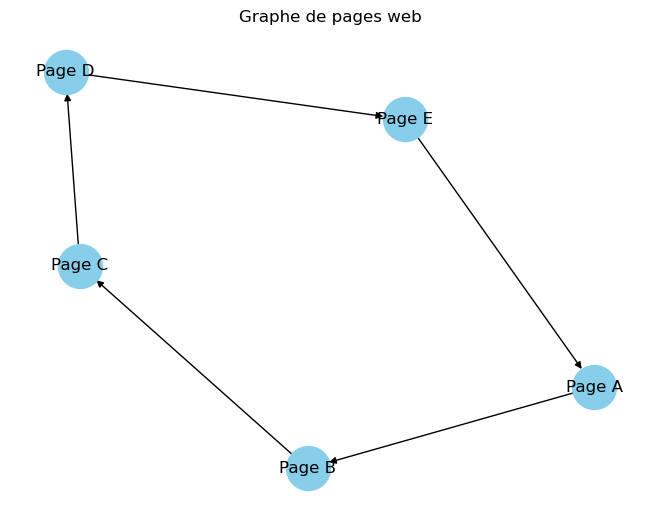

Scores PageRank : {'Page A': 0.2, 'Page B': 0.2, 'Page C': 0.2, 'Page D': 0.2, 'Page E': 0.2}
Rang des noeuds (pages) :
1. Page A: 0.2
2. Page B: 0.2
3. Page C: 0.2
4. Page D: 0.2
5. Page E: 0.2


In [210]:
import networkx as nx
import matplotlib.pyplot as plt

# Création d'un graphe de pages web
G = nx.DiGraph()
G.add_edges_from([
    ("Page A", "Page B"),
    ("Page B", "Page C"),
    ("Page C", "Page D"),
    ("Page D", "Page E"),
    ("Page E", "Page A"),
])

# Dessin du graphe
nx.draw(G, with_labels=True, node_size=1000, node_color='skyblue')
plt.title("Graphe de pages web")
plt.show()

# Calcul du PageRank
pagerank_scores = nx.pagerank(G, alpha=0.15)

# Affichage des scores PageRank
print("Scores PageRank :", pagerank_scores)

# Affichage du rang des noeuds (pages)
ranked_pages = sorted(pagerank_scores, key=pagerank_scores.get, reverse=True)
print("Rang des noeuds (pages) :")
for i, page in enumerate(ranked_pages):
    print(f"{i+1}. {page}: {pagerank_scores[page]}")


In [275]:
def pagerank_GPR(Q, α=0.15, tol=1e-6):
    N = Q.shape[0]
    e = np.ones(N)
    r0 = np.zeros(N)
    r0[1] = 1
    n_iter = 0
    while True:
        n_iter += 1
        r1 = α * r0.dot(Q)
        β = 1 - np.linalg.norm(r1, ord=2)
        r2 = r1 + (β/N)*e
        
        s =  norm(r2 - r0, ord=2)
        
        r0 = r2
        
        print(f"iter = {n_iter}")
        print(f"π0 = {r0[0]} | π1 = {r0[1]} | π2 = {r0[2]}")
#         print(f"delta = {s}")
        if s < tol:
            break
    
    return r0

In [276]:
# Calculer les scores PageRank avec l'algorithme GPR
pagerank_scores = pagerank_GPR(B, α=0.15, tol=1e-6)
pagerank_scores

iter = 1
π0 = 0.2625525665205765 | π1 = 0.11255256652057653 | π2 = 0.2625525665205765
iter = 2
π0 = 0.27391484768173047 | π1 = 0.16700042279129806 | π2 = 0.16700042279129806
iter = 3
π0 = 0.30077195358636366 | π1 = 0.16961420374617717 | π2 = 0.17214663649289014
iter = 4
π0 = 0.30447387684194227 | π1 = 0.17185986978348433 | π2 = 0.1752375143842816
iter = 5
π0 = 0.30663918103067683 | π1 = 0.17229405956481378 | π2 = 0.17560373245898317
iter = 6
π0 = 0.3071983005829656 | π1 = 0.17246101506929462 | π2 = 0.1758314112052976
iter = 7
π0 = 0.3074133650323817 | π1 = 0.17251397429823573 | π2 = 0.1758850312180436
iter = 8
π0 = 0.30747818134435234 | π1 = 0.17253251419556498 | π2 = 0.1759072284966529
iter = 9
π0 = 0.3075010000157901 | π1 = 0.1725383558635662 | π2 = 0.1759137131401133
iter = 10
π0 = 0.30750825441008217 | π1 = 0.17254035570790788 | π2 = 0.175916033685826
iter = 11
π0 = 0.3075107185608654 | π1 = 0.17254100294473035 | π2 = 0.17591676425497288
iter = 12
π0 = 0.3075115203392035 | π1 = 0.1

array([0.30751179, 0.17254129, 0.17591709, 0.15003591, 0.19892884,
       0.2023806 , 0.15003591])

In [281]:
np.full(5, 1) / 5

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [282]:
def pagerank_GPR(A, α=0.15, tol=1e-5):
    n = A.shape[0]
    e = np.ones(n)
    x = np.zeros(n)

    x0 = np.full(n, 1) / n
    
    A_α = (1 - α) * A + α * np.dot(e.T, x)
    x = x0
    
    print(A_α)
    while True:
        
        next_x = (1 - α) * x.dot(A) + α * x0
        
        δ = np.linalg.norm(next_x - x, ord = 2)
        x = next_x
        
        print(f"dela = {δ}")
        if δ < tol:
            break
    
    return x

In [283]:
B = np.array([
    [1, 1, 1, 1, 1, 1, 1],
    [1,   0, 1,   0,   0,  0,   0 ], 
    [1,   0,  0,    0, 1,  0,   0 ],
    [1,   0,  0,    0, 1,  0,   0 ],
    [1,   0,  0,    0, 0,  1,   0 ],
    [1  ,   0,  0,    0, 0,    0,   0 ],
    [1, 1,  0,    0, 0,    1, 0 ] ])
# Calculer les scores PageRank avec l'algorithme GPR
pagerank_scores = pagerank_GPR(B, α=0.15, tol=1e-6)
pagerank_scores

[[0.85 0.85 0.85 0.85 0.85 0.85 0.85]
 [0.85 0.   0.85 0.   0.   0.   0.  ]
 [0.85 0.   0.   0.   0.85 0.   0.  ]
 [0.85 0.   0.   0.   0.85 0.   0.  ]
 [0.85 0.   0.   0.   0.   0.85 0.  ]
 [0.85 0.   0.   0.   0.   0.   0.  ]
 [0.85 0.85 0.   0.   0.   0.85 0.  ]]
dela = 0.823568640808068
dela = 2.1001000340605733
dela = 6.134980217865165
dela = 17.53528140343492
dela = 50.85448196594484
dela = 146.8304451638086
dela = 424.7251191633536
dela = 1227.7000562582728
dela = 3549.793097940299
dela = 10262.724091796448
dela = 29671.745318362737
dela = 85785.74062408644
dela = 248022.18235913094
dela = 717074.9785744741
dela = 2073190.2989330892
dela = 5993955.8970582215
dela = 17329578.86500535
dela = 50102850.85548582
dela = 144856131.17341033
dela = 418804481.0204623
dela = 1210837213.9693494
dela = 3500742761.5712337
dela = 10121261349.093058
dela = 29262341804.62796
dela = 84602562712.61264
dela = 244600847905.56354
dela = 707183953762.7072
dela = 2044592848867.2683
dela = 5911276543271

C:\Users\pgangbadja\AppData\Local\Temp\ipykernel_28944\3085857246.py:16: RuntimeWarning: invalid value encountered in subtract
  δ = np.linalg.norm(next_x - x, ord = 2)


dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan
dela = nan

KeyboardInterrupt: 

In [291]:
import numpy as np

def page_rank(adjacency_matrix, teleportation_probability=0.15, max_iterations=100):
  # Initialize the PageRank scores with a uniform distribution
    num_nodes = adjacency_matrix.shape[0]
    page_rank_scores = np.ones(num_nodes) / num_nodes

  # Iteratively update the PageRank scores
    for _ in range(max_iterations):
    # Perform the matrix-vector multiplication
        new_page_rank_scores = adjacency_matrix.dot(page_rank_scores)

        # Add the teleportation probability
        new_page_rank_scores = teleportation_probability + (1 - teleportation_probability) * new_page_rank_scores
        # Check for convergence
        if np.allclose(page_rank_scores, new_page_rank_scores):
            break

        page_rank_scores = new_page_rank_scores
    return page_rank_scores

In [292]:
page_rank(B)

array([5.00418905e+45, 2.06830947e+45, 2.03092324e+45, 2.03092324e+45,
       1.90375836e+45, 1.47122195e+45, 2.51183737e+45])

In [293]:
from numpy import linalg as LA

def pagerank_GPR(A, α=0.15, tol=1e-5):
    n = A.shape[0]
    e = np.ones(n)
    x = np.zeros(n)

    x0 = np.full(n, 1) / n
    
    A_α = (1 - α) * A + α * np.dot(e.T, x)
    x = x0
    
    print(A_α)
    while True:
        
        v = (1 - α) * x.dot(A) + α * x0
        next_x, _ = LA.eig(v)
        
        δ = np.linalg.norm(next_x - x, ord = 2)
        x = next_x
        
        print(f"dela = {δ}")
        if δ < tol:
            break
    
    return x